# Demo of The 16-Bit-Integer SQT Python Version<br>
by Ahmad Hasanain<br>
ECE 6999 Dissertation, FIT


Frame Rate:  307.6923076923077
Initialization time:  2.732560157775879  (s)
Extraction time:  3.781623125076294  (s)
Reconstuction time:  0.026368141174316406  (s)


'Output:'

'Input:'

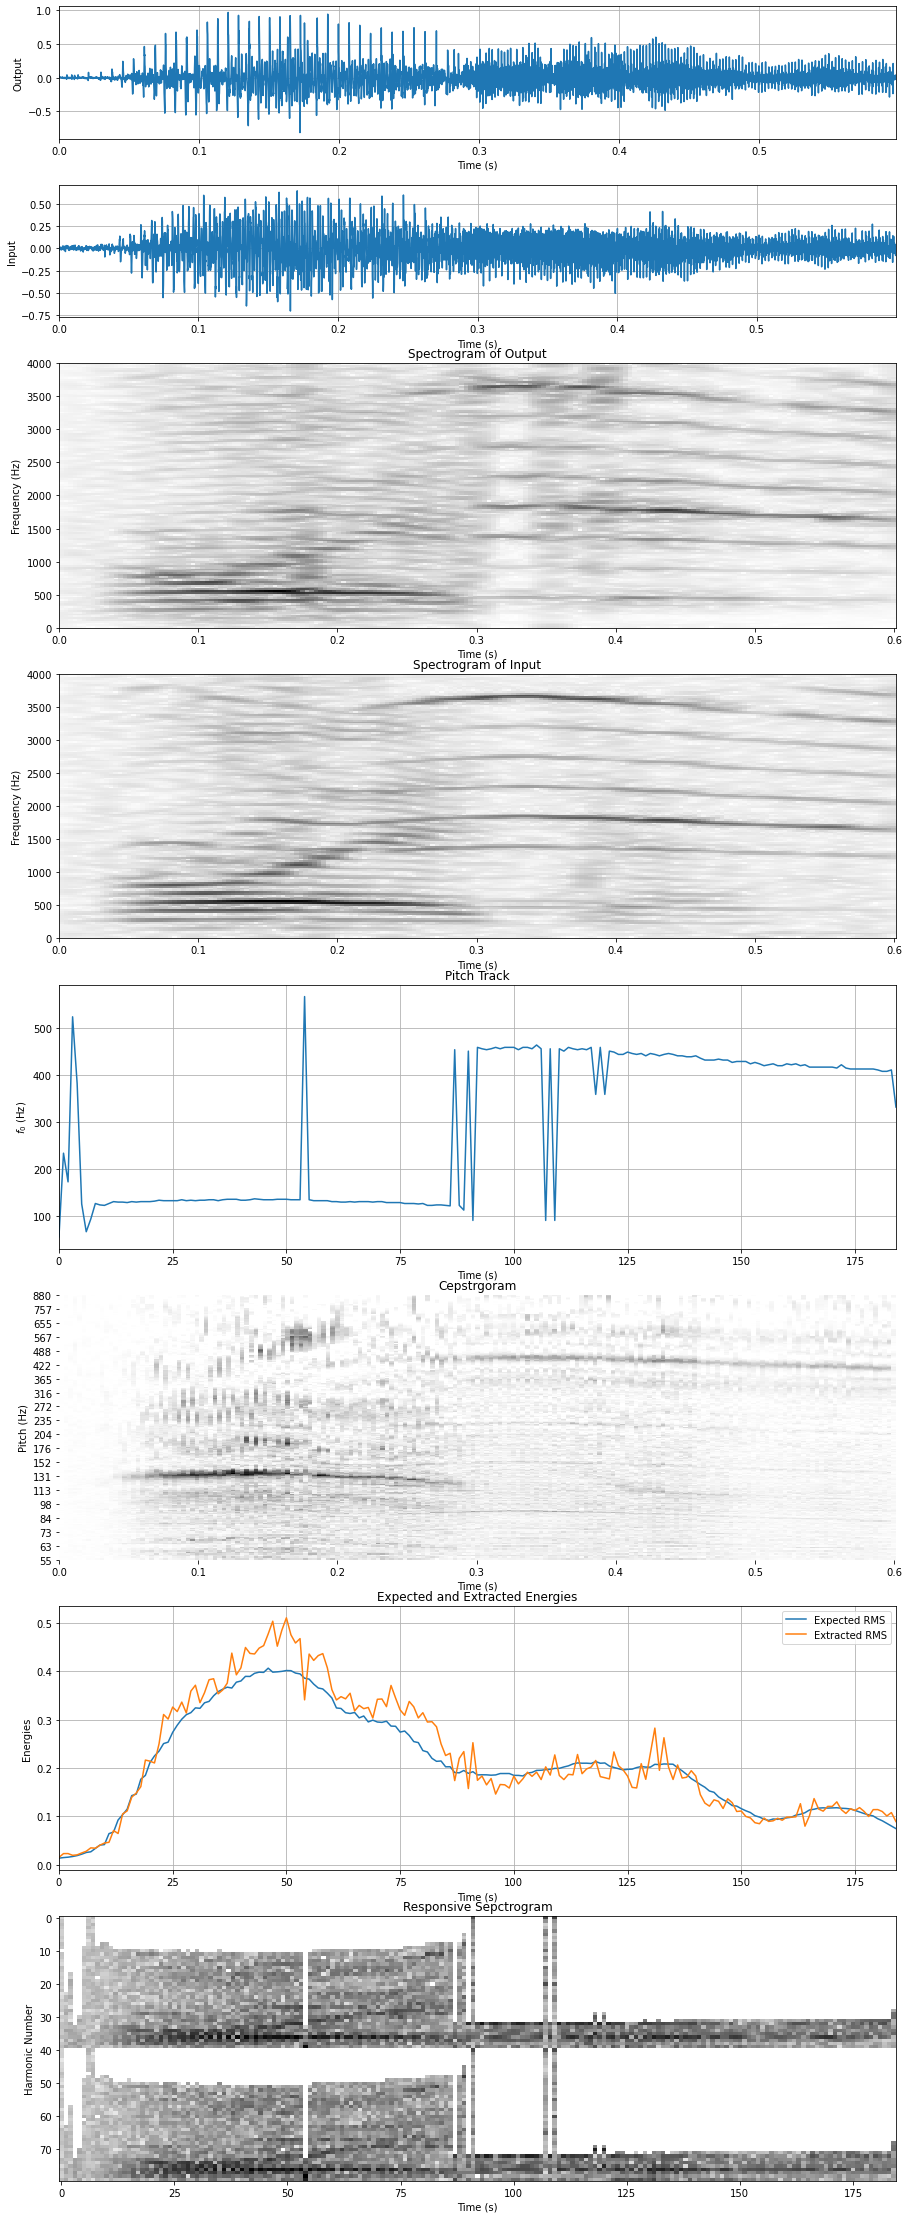

In [1]:

# import SQT library
import sys
sys.path.insert(0, '../../')
import sqtpy

# import demo libraries
import time
import numpy as np
import scipy.io.wavfile
from IPython.display import display, Audio
import matplotlib.pyplot as plt


# initalize an SQT instance
timer = time.time()
sqt = sqtpy.SQT( N = 500 , Rs = 300,  M = 40 , Fmin = 55 , Fmax = 880 , Fs = 8000,
                lifter = 1, smooth=0 )
print( "Initialization time: ", time.time() - timer, " (s)")


# load a speech signal 
Fs, I1 = scipy.io.wavfile.read( "infant.wav" , sqt.Fs )
Fs, I2 = scipy.io.wavfile.read( "female.wav" , sqt.Fs )
Fs, I3 = scipy.io.wavfile.read( "male.wav" , sqt.Fs )
def WhiteNoise( I , snr_db ):
    s = np.std( I ) * 10.0 ** ( - snr_db / 20.0 )
    return I + np.random.normal(loc=0.0, scale = s , size = len(I) )

# choose and mix
I0 = WhiteNoise( I3 , 20 ) * 0.5 + I2 * 0.1 + I1 * 0.4 

# extract
timer = time.time()
[F0, Hm, Et] = sqt.encode( I0 )
print( "Extraction time: ", time.time() - timer, " (s)")

# # repeat extract
# timer = time.time()
# [F0, Hm, Et] = sqt.encode( I0 )
# print( "Repeated Extraction time: ", time.time() - timer, " (s)")


# reconstruct
timer = time.time()
I = sqt.decode( F0, Hm )
print( "Reconstuction time: ", time.time() - timer, " (s)")


# play reconscutred and origianl audio serie
display("Output:", Audio( data=I  ,rate=sqt.Fs) )
display("Input:",  Audio( data=I0 ,rate=sqt.Fs) )


# figures

fig, axes = plt.subplots(8, 1, sharex=False, figsize=(15,int(2*20)),
                         gridspec_kw={'height_ratios': [1,1,2, 2, 2,2,2,2]})


ax = axes[0]
ax.plot( np.arange(len(I))/sqt.Fs , I )
ax.set_ylabel( 'Output' )
ax.set_xlabel(  'Time (s)' )
ax.autoscale(enable=True, axis='x', tight=True)
ax.grid()

ax = axes[1]
ax.plot( np.arange(len(I0))/sqt.Fs , I0  )
ax.set_ylabel( 'Input' )
ax.set_xlabel(  'Time (s)' )
ax.autoscale(enable=True, axis='x', tight=True)
ax.grid()

# plot the spectrogram of reconscutred and original audios

S = sqtpy.spect( I   , sqt.c , sqt.s  ) # reconstructed signal
ax = axes[2]; ax.set_title( "Spectrogram of Output" )
im = ax.imshow(np.rot90(  S**.25  ),cmap = 'binary',aspect = 'auto',interpolation='nearest',
               extent=[0, len(F0) * sqt.s / sqt.Fs, 0 , sqt.Fs/2 ] )
ax.set_ylabel(   'Frequency (Hz)'     )
ax.set_xlabel(  'Time (s)' )
S0 = sqtpy.spect( I0   , sqt.c , sqt.s ) # original signal
ax = axes[3]; ax.set_title( "Spectrogram of Input" )
im = ax.imshow(np.rot90(  S0**.25  ),cmap = 'binary',aspect = 'auto',interpolation='nearest',
               extent=[0, len(F0) * sqt.s / sqt.Fs, 0 , sqt.Fs/2 ] )
ax.set_ylabel(   'Frequency (Hz)'     )
ax.set_xlabel(  'Time (s)' )

# plot Pitch Track and Cepstrgoram

ax = axes[4]; ax.set_title( "Pitch Track" )
ax.plot( F0  )
ax.set_ylabel( '$f_0$ (Hz)'  )
ax.set_xlabel(  'Time (s)' )
ax.autoscale(enable=True, axis='x', tight=True)
ax.grid()

ax = axes[5]; ax.set_title( "Cepstrgoram" )
ax.imshow(   np.rot90(sqt.Q) , cmap = 'binary'  , aspect = 'auto' , interpolation='nearest',
          extent=[0, len(F0) * sqt.s / sqt.Fs, 0, len(sqt.R)-1 ] )
ax.set_ylabel( 'Pitch (Hz)'  )
ax.set_xlabel(  'Time (s)' )
ax.set_frame_on(False)
hz = np.linspace(0, len(sqt.R)-1 , 20)
ax.yaxis.set_ticks( hz )
ax.yaxis.set_ticklabels( sqt.R[hz.astype(int)].astype(int).astype(str) )


# plot temporal and spectral energies

ax = axes[6]; ax.set_title( "Expected and Extracted Energies" )
ax.plot( range(len(Et)), Et, label="Expected RMS" )
ax.plot( range(len(Et)), np.sum(Hm,1) , label="Extracted RMS")
ax.set_ylabel( 'Energies' ) 
ax.set_xlabel(  'Time (s)' )
ax.autoscale(enable=True, axis='x', tight=True)
ax.grid()
ax.legend(loc='best')

ax = axes[7]; ax.set_title( "Responsive Sepctrogram" )
im = ax.imshow(   np.rot90(  Hm**0.25  ) , cmap = 'binary'  , aspect = 'auto' ,
               interpolation='nearest' )
ax.set_ylabel( 'Harmonic Number'  )
ax.set_xlabel(  'Time (s)' )

print("\n\n")





Authored by Ahmad Hasanain, 
revised by Muntaser Syed, 
and supervised by Dr Veton Kepuska, 
Florida Instittue of Technology - AhmadZuhair.com © 2022
